In [106]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [107]:
link="https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Sigmoid.csv"
data=pd.read_csv(link)



In [108]:
x=data["x"]
tam=len(data["x"])
x=np.zeros(tam)
y=np.zeros(tam)
for d in range (tam):
    x[d]=data["x"][d]
    y[d]=data["y"][d]
    

In [109]:
#Defina el modelo de ajuste como:
M=lambda x,teta:  teta[0]/(teta[1]+np.exp(-teta[2]*x))

In [110]:
#b) Defina la m´etrica (funci´on de costo) a minimizar como:
C= lambda y,x,teta: np.sum((y-M(x,teta))**2)
def C (p,x,y):
    term= y-M(x,p)
    return np.sum(term**2)

In [111]:
'''
e)Use una taza de aprendizaje γ = 1 × 10−3 o γ = 5 × 10−4
,
~θ0 = [1, 1, 1], un error de
parada  = 0.01 y un m´aximo de iteraciones de 1 × 104
.
'''



teta=np.array([1,1,1])
print(teta)

def GetGrad(M,teta,x,h=1e-6):
    
    dim=len(teta)
    J = np.zeros(dim)
    
    for i in range(dim):#que recorra la cantidad de tamaño de teta 
        h_=np.zeros(dim)
        
        h_[i]=h
           
        J[i] = (  M(x,teta+h_) - M(x,teta-h_) )/(2*h)
            
            
        
    return J



[1 1 1]


In [112]:
GetGrad (M,teta,x[1])

array([ 0.59694146, -0.3563391 ,  0.0944935 ])

In [113]:
def DescGrad(M,teta,x,y,lr=1e-3,epochs=int(1e4),error=1e-2):
    d=1
    i=0  
    print("entrenando")
    
    while d > error and i < epochs:
        Cu = C(teta,x,y)
        S=0
        #Machine Learning
        for a in range(len(y)):
            S += (y[a]-M(x[a],teta))*GetGrad(M,teta,x[a])
        
            
        teta = teta - lr*(-2)*S
        NewMe = C(teta,x,y)
        d= np.abs(Cu-NewMe)/NewMe
        d=np.sqrt(NewMe/len(y))
        
            
        i += 1
        
    if d < error:
        print('entrenamiento completo ', teta, 'iteraciones: ', i)
        
    if i == epochs:
        print('se alcanzó iteraciones maximas',teta)
        
    return teta,i


par,num_it=DescGrad(M,teta,x,y)
print("parametros: ",par)


entrenando
se alcanzó iteraciones maximas [4.35688153 0.96529913 2.79303678]
parametros:  [4.35688153 0.96529913 2.79303678]


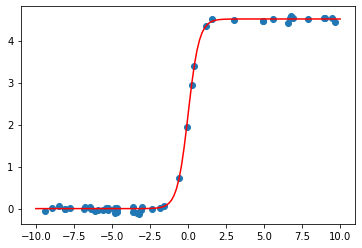

In [114]:
X=np.linspace(-10,10,120)
plt.scatter(x,y)
plt.plot(X,M(X,par),color="r")
plt.show()